# Predicting Bank’s Churn with Artificial Neural Networks

About Dataset: (Bank Churn): This is an international Bank data with 10,000 X 14 records

Business scenario: The bank has been seen unusual churn rates for their customers (churn is when people leave the company). 
They want to understand the problem. Therefore, they hired me, as a data scientist, to look into their data set and give them insights / solutions.Six months ago the bank took a sample of their customers and measured some characteristics about their customers, such as credit score, geography, gender, age,tenure (how many years a customer is with the bank), balance, number of products a customer had with the bank, if he had a credit card, if he is an active member,estimated salary (the bank has estimated the salary based of the data they had), exited (if a customer has left the bank or not within the last six months). 
Our task is to create a classification model to tell the bank which of the customers are at the highest risk of leaving.

# 1. Data Preprocessing

# Import Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")

# Import Dataset

In [143]:
df = pd.read_csv('E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Class 5/Bank_Churn.csv')

In [144]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Top 10 records of data

In [145]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Statistical Term of data

In [147]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Null Values in Dataset

In [148]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

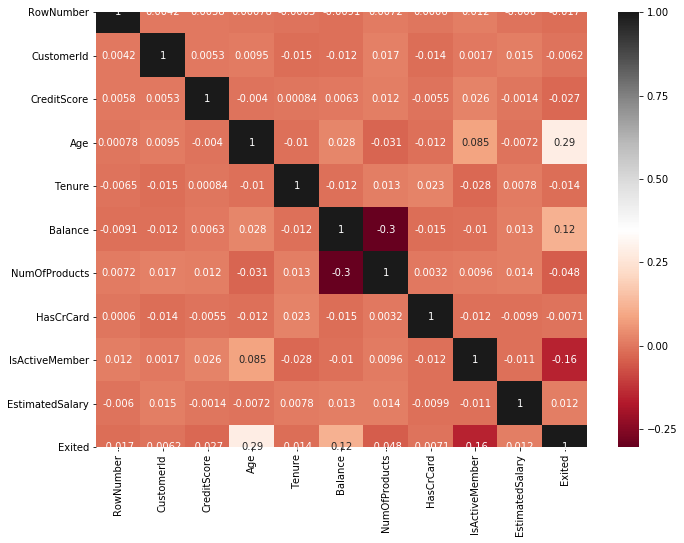

In [183]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdGy")
plt.show()

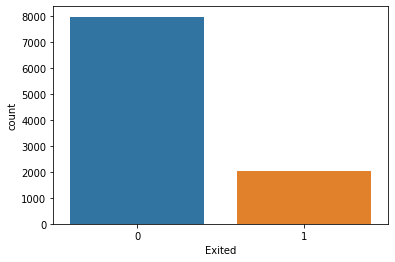

In [184]:
sns.countplot(df.Exited)

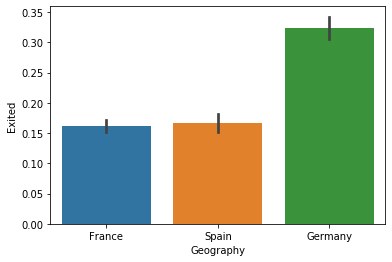

In [186]:
sns.barplot(x="Geography", y="Exited", data=df)

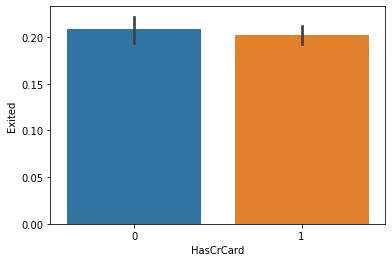

In [187]:
sns.barplot(x='HasCrCard', y="Exited", data=df)

# Segregating data into dependent (y)and independent variables(x)

In [149]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

# Encoding categorical data

# Label Encoding the "Gender" column

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# One Hot Encoding the "Geography" column

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [152]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [153]:
print(y)

[1 0 1 ... 1 1 0]


# Splitting the data into training and test set

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [155]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.transform(X_test)

# 2. Now let’s make the Artificial Neural Network

In [156]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Step 1 in ANN Initialising the ANN - Defining as a sequence of layers 

In [157]:
ann = tf.keras.models.Sequential()

# Step 2 in ANN : Adding the input layer and first hidden layer

In [158]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Step 3 in ANN : Adding the Second hidden layer layer

In [159]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Step 4 in ANN : Adding the Output Layer

Sigmoid activation function is used whenever we need Probabilities of 2 categories or less(Similar to Logistic Regression)
Switch to Softmax when the dependent variable has more than 2 categories.

In [160]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Step 5 in ANN Stochastic Gradient Descent — Compiling the ANN

In [161]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 6 in ANN Training the ANN on the Training set

In [162]:
an=ann.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
750/750 [==============================] - 1s 682us/step - loss: 0.5564 - accuracy: 0.7597
Epoch 2/100
750/750 [==============================] - 1s 705us/step - loss: 0.4686 - accuracy: 0.7993
Epoch 3/100
750/750 [==============================] - 1s 694us/step - loss: 0.4510 - accuracy: 0.8037
Epoch 4/100
750/750 [==============================] - 1s 698us/step - loss: 0.4409 - accuracy: 0.8075
Epoch 5/100
750/750 [==============================] - 1s 698us/step - loss: 0.4338 - accuracy: 0.8101
Epoch 6/100
750/750 [==============================] - 1s 696us/step - loss: 0.4249 - accuracy: 0.8132
Epoch 7/100
750/750 [==============================] - 1s 702us/step - loss: 0.4095 - accuracy: 0.8212
Epoch 8/100
750/750 [==============================] - 1s 698us/step - loss: 0.3948 - accuracy: 0.8279
Epoch 9/100
750/750 [==============================] - 1s 704us/step - loss: 0.3846 - accuracy: 0.8364
Epoch 10/100
750/750 [==============================] - 1s 697us/step - l

# 3. Making the predictions and evaluating the model

In [217]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Predicting test set results

In [193]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Accuracy of the model

In [195]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_ann = confusion_matrix(y_test, y_pred)
print(cm_ann)
acc=accuracy_score(y_test, y_pred)
print(acc)

[[1919   72]
 [ 267  242]]
0.8644


# Visualize Confusion Matrix

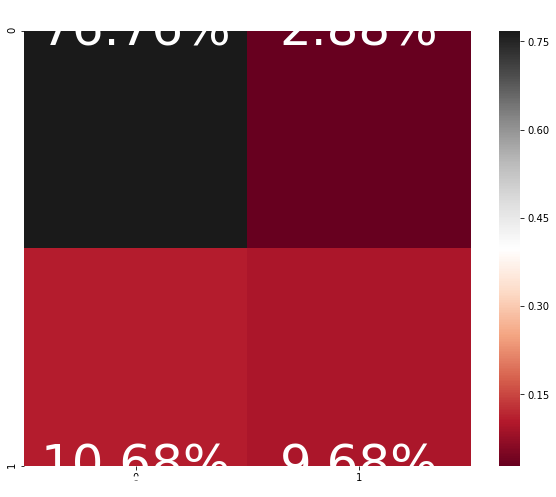

In [215]:
plt.figure(figsize=(10,8))
sns.heatmap(cm_ann/np.sum(cm_ann), annot=True, fmt='.2%', cmap='RdGy',annot_kws={"size": 50})

# Classification Report of Model 

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1991
           1       0.77      0.48      0.59       509

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.86      0.85      2500



# Specificity

In [171]:
specificity_ANN =(cm_ann[1,1]/(cm_ann[1,1]+cm_ann[0,1]))
specificity_ANN

0.7707006369426752

# Sensitivity

In [172]:
sensitivity_ANN =(cm_ann[0,0]/(cm_ann[0,0]+cm_ann[1,0]))
sensitivity_ANN

0.8778591033851784

# Visualize loss and accuracy of model

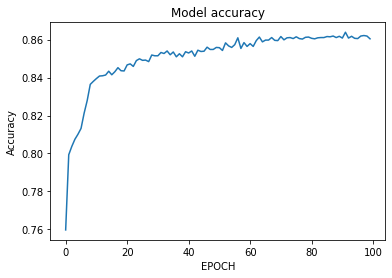

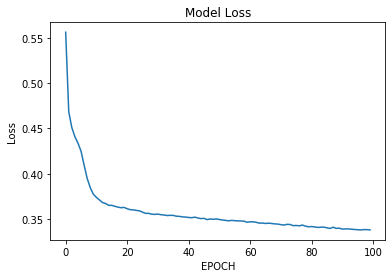

In [173]:
import matplotlib.pyplot as plt

#Accuracy 
an.history.keys()
# summarize history for accuracy
plt.plot(an.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('EPOCH')
plt.show()



#Loss
an.history.keys()
# summarize history for loss
plt.plot(an.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCH')
plt.show()

# Conclusion :

The Model achieved accuracy 86.44% ,specificity of 77%, sensitivity of 87% . 
From this data, the bank can analyse the customer's requirement and problems to cater the customers in a better manner
and to avoid churn.

The bank has been seen unusual churn rates for their customers (churn is when people leave the company). They want to understand the problem. Therefore, they hired me, as a data scientist, to look into their data set and give them insights / solutions.Six months ago the bank took a sample of their customers and measured some characteristics about their customers, such as credit score, geography, gender, age,tenure (how many years a customer is with the bank),balance, number of products a customer had with the bank, if he had a credit card, if he is an active member,estimated salary (the bank has estimated the salary based of the data they had), exited (if a customer has left the bank or not within the last six months). I created a Neural Network model to tell the bank which of the customers are at the highest risk of leaving.Whichever have TRUE in y_pred value they are going to leave bank in last 6 months.